<a href="https://colab.research.google.com/github/lelongc/ro/blob/main/TEXT-TO-IMAGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# @title 1. Cài đặt và Biên dịch thủ công (Mất khoảng 15 phút)
import os
import shutil

# --- BƯỚC 1: LÀM SẠCH MÔI TRƯỜNG ---
# Xóa thư mục cũ để đảm bảo không bị lỗi file rác
if os.path.exists("/content/TRELLIS.2"):
    shutil.rmtree("/content/TRELLIS.2")

# --- BƯỚC 2: TẢI CODE ĐẦY ĐỦ ---
# Dùng --recursive để tải cả các thư viện con (cumesh, o-voxel...)
!git clone --recursive https://github.com/microsoft/TRELLIS.2.git
%cd /content/TRELLIS.2

# --- BƯỚC 3: CÀI ĐẶT DEPENDENCIES CƠ BẢN ---
# Cài Ninja để biên dịch code C++
!pip install ninja
# Cài xformers để tiết kiệm VRAM (Thay thế flash-attn không chạy tốt trên T4)
!pip install xformers --index-url https://download.pytorch.org/whl/cu121
!pip install diffusers transformers accelerate imageio[ffmpeg] rembg trimesh

# --- BƯỚC 4: CÀI ĐẶT CÁC MODULE LÕI (Thủ công) ---
# Đây là bước sửa lỗi "No module named cumesh"
# Chúng ta cài từng cái một để đảm bảo nó được biên dịch
print("⏳ Đang biên dịch CUMESH...")
!pip install ./submodules/cumesh

print("⏳ Đang biên dịch O-VOXEL...")
!pip install ./submodules/o-voxel

print("⏳ Đang biên dịch FLEXGEMM...")
!pip install ./submodules/flexgemm

print("⏳ Đang biên dịch NVDIFFRAST & NVDIFFREC...")
!pip install ./submodules/nvdiffrast
!pip install ./submodules/nvdiffrec

# Cài đặt gói chính
!pip install .

print("✅ Đã cài đặt xong! Hãy chạy bước tiếp theo.")

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
fatal: could not create work tree dir 'TRELLIS.2': No such file or directory
[Errno 2] No such file or directory: '/content/TRELLIS.2'
/content/TRELLIS.2
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
The folder you are executing pip from can no longer be found.
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
The folder you are executing pip from can no longer be found.
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
shell-init: error retrievi

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/diffusers/pipelines/stable_diffusion_xl/pipeline_stable_diffusion_xl.py:748: FutureWarning: `upcast_vae` is deprecated and will be removed in version 1.0.0. `upcast_vae` is deprecated. Please use `pipe.vae.to(torch.float32)`. For more details, please refer to: https://github.com/huggingface/diffusers/pull/12619#issue-3606633695.
  deprecate(


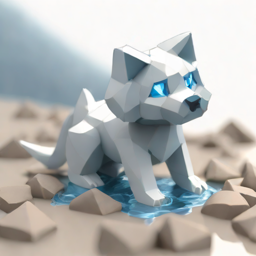

In [14]:
# @title 2. Tạo ảnh Stone Pet Input
import torch
from diffusers import AutoPipelineForText2Image
from PIL import Image

# Prompt mô tả con pet đá của bạn
prompt = "Cute low-poly stone pet with water element, blue glowing eyes, isometric view, white background, 3d blender render style, high quality, single object, masterpiece"
negative_prompt = "shadow, complex background, text, watermark, blurry, noise, low quality, multiple angles"

# Load model tạo ảnh nhẹ (SDXL Turbo)
pipe = AutoPipelineForText2Image.from_pretrained(
    "stabilityai/sdxl-turbo",
    torch_dtype=torch.float16,
    variant="fp16"
).to("cuda")

# Tạo ảnh
image = pipe(prompt=prompt, num_inference_steps=2, guidance_scale=0.0).images[0]
image.save("/content/input_pet.png")

# Hiển thị
from IPython.display import display
display(image.resize((256, 256)))